In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a set of random lat and long combinations
lats= np.random.uniform(low=-90, high=90, size=1500)
lngs=np.random.uniform(low=-90, high=90, size=1500)
lat_lngs =zip(lats, lngs)
lat_lngs

In [3]:
# add the lats and lngs to a list
coordinates =list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.453169506809715 -49.75653725690093
73.5642507019605 0.2802264754575816
39.77618826009703 23.687851629479624
-83.13288325746956 -66.5851108149481
-6.291400157688926 80.83912041686517
-57.200379780036045 57.0027708883145
-28.52456234527778 -55.521340107813096
-0.17383471577777243 28.553376190723014
-57.77094132304112 -20.955147984172072
31.215510244504188 8.687810194790131
-17.341620615720714 -86.14457727450421
40.32663687822475 65.07901448964168
-75.01840563992134 -89.26721711726778
-35.89892180122379 -38.890989272654096
-49.89949566794639 67.7324753296644
-26.360038344083634 88.2118483646882
-88.62208729167403 -56.57699060698236
-3.31204626112347 14.357598766093716
-53.27543932587985 -78.42500266723461
-65.8912385978065 -22.901745216712968
11.61872706076936 82.8819989068815
37.46465104561727 -51.905816879517744
-88.26286422065495 -60.13745772381284
-48.43864501360521 -46.336476429477706
-76.86161281145974 53.428996381266614
-34.883298788394455 41.85868243613427
65.55165184898146 -34

-73.83835559145815 -36.862398268997865
-54.063530320680954 -0.24560921127519464
-59.64823068651631 -25.996602690721645
15.572587720336472 14.847591559695871
54.46687868349474 25.741928053284397
89.37205814235136 87.30346655968322
85.17247001086494 71.1197918049429
67.47490355677024 22.493722161933164
23.396262955920136 89.23831367060478
-48.512472039542104 -71.76011979276964
29.701844736065866 -51.759580177653696
-9.502785205218245 49.34887038578063
-35.94215216846456 -41.26136396068931
78.09535629523143 35.866304235539374
27.20771837450613 -34.721602007977175
58.707754504120715 12.249738603283731
70.421948135133 -86.44659722799894
72.84686212954358 -75.91750867589178
14.666894797398939 -76.95894265875003
-20.533383784090944 67.9462868498403
48.83029422493732 -16.6759883949387
-70.65220005347639 47.375425955462134
-75.10774292900034 20.452102124081605
19.320984751884268 -21.350342961237615
-74.93041047059127 -40.44348107768365
79.24066424638556 -54.25106198117159
-84.80878772112834 73.

In [5]:
from citipy import citipy

In [6]:
# create a list for holding the cities
cities =[]
# identify the nearest city for each lat n lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm the sufficient count
len(cities)

617

In [7]:
import requests
from config import weather_api_key
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14fd419c1ad697fae6098b0625f08e7c


In [9]:
# create an empty list to hold weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval")
print("-------------------------")
# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the url, record and set numbers and the city.
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
# run an api request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city info into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date,
                         "Max Temp": city_max_temp})
# if an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass
    # indicate that Data loading is complete
print("----------------------")
print("Data Retrieval Complete")
print("----------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | baiao
Processing Record 2 of set 1 | roald
Processing Record 3 of set 1 | khaniotis
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | hithadhoo
Processing Record 6 of set 1 | taolanaro
City not found. Skipping ...
Processing Record 7 of set 1 | sao borja
Processing Record 8 of set 1 | butembo
Processing Record 9 of set 1 | cidreira
Processing Record 10 of set 1 | duz
City not found. Skipping ...
Processing Record 11 of set 1 | lima
Processing Record 12 of set 1 | karmana
City not found. Skipping ...
Processing Record 13 of set 1 | punta arenas
Processing Record 14 of set 1 | laguna
Processing Record 15 of set 1 | saint-philippe
Processing Record 16 of set 1 | carnarvon
Processing Record 17 of set 1 | djambala
Processing Record 18 of set 1 | chuy
Processing Record 19 of set 1 | mamallapuram
Processing Record 20 of set 1 | bay roberts
Processing Record 21 of set 1 | mar del plata
Process

Processing Record 184 of set 4 | port-gentil
Processing Record 185 of set 4 | hofn
Processing Record 186 of set 4 | mahebourg
Processing Record 187 of set 4 | severnyy
Processing Record 188 of set 4 | bathsheba
Processing Record 189 of set 4 | paradwip
City not found. Skipping ...
Processing Record 190 of set 4 | kiruna
Processing Record 191 of set 4 | ponta delgada
Processing Record 192 of set 4 | ajdabiya
Processing Record 193 of set 4 | laguna de perlas
Processing Record 194 of set 4 | tornio
Processing Record 195 of set 4 | salalah
Processing Record 196 of set 4 | solovetskiy
City not found. Skipping ...
Processing Record 197 of set 4 | san alberto
Processing Record 198 of set 4 | wilmington
Processing Record 199 of set 4 | bonfim
Processing Record 200 of set 4 | sao gabriel da cachoeira
Processing Record 201 of set 4 | maltahohe
Processing Record 202 of set 4 | sao filipe
Processing Record 203 of set 4 | biltine
Processing Record 205 of set 5 | pombas
Processing Record 206 of set 

Processing Record 370 of set 8 | brus laguna
Processing Record 371 of set 8 | gornopravdinsk
Processing Record 372 of set 8 | nioro
Processing Record 373 of set 8 | kristiinankaupunki
Processing Record 374 of set 8 | bauru
Processing Record 375 of set 8 | varna
Processing Record 376 of set 8 | navahrudak
Processing Record 377 of set 8 | khaga
Processing Record 378 of set 8 | joensuu
Processing Record 379 of set 8 | piacabucu
Processing Record 380 of set 8 | sur
Processing Record 381 of set 8 | oyem
Processing Record 382 of set 8 | alvaraes
Processing Record 383 of set 8 | langres
Processing Record 384 of set 8 | ilebo
Processing Record 385 of set 8 | taoudenni
Processing Record 386 of set 8 | mwanza
Processing Record 387 of set 8 | naantali
Processing Record 388 of set 8 | scarborough
Processing Record 389 of set 8 | swellendam
Processing Record 390 of set 8 | adancata
Processing Record 391 of set 8 | shelburne
Processing Record 392 of set 8 | arvika
Processing Record 393 of set 8 | co

Processing Record 558 of set 11 | mantua
Processing Record 559 of set 11 | greenwood
Processing Record 560 of set 11 | batsfjord
Processing Record 562 of set 12 | brighton
Processing Record 563 of set 12 | jaca
Processing Record 564 of set 12 | san carlos
Processing Record 565 of set 12 | mafinga
Processing Record 566 of set 12 | sorkjosen
Processing Record 567 of set 12 | kudahuvadhoo
Processing Record 568 of set 12 | masallatah
Processing Record 569 of set 12 | mirina
City not found. Skipping ...
Processing Record 570 of set 12 | metehara
City not found. Skipping ...
Processing Record 571 of set 12 | chabahar
Processing Record 572 of set 12 | minab
Processing Record 573 of set 12 | gracac
Processing Record 574 of set 12 | vestmanna
Processing Record 575 of set 12 | afrikanda
Processing Record 576 of set 12 | newtownards
Processing Record 577 of set 12 | bafra
Processing Record 578 of set 12 | sirjan
Processing Record 579 of set 12 | ljungby
Processing Record 580 of set 12 | qarqin
Pr

In [10]:
len(city_data)

568

In [11]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp
0,Baiao,-2.7906,-49.6717,94,99,1.99,BR,2021-03-23 23:18:35,74.43
1,Roald,62.5833,6.1333,61,75,34.52,NO,2021-03-23 23:18:35,46.40
2,Khaniotis,39.9991,23.5800,75,100,5.01,GR,2021-03-23 23:18:35,39.00
3,Ushuaia,-54.8000,-68.3000,81,90,16.11,AR,2021-03-23 23:14:29,44.60
4,Hithadhoo,-0.6000,73.0833,71,100,7.61,MV,2021-03-23 23:18:36,82.85
5,Sao Borja,-28.6606,-56.0044,83,68,7.20,BR,2021-03-23 23:18:36,73.20
6,Butembo,0.1500,29.2833,82,55,3.11,CD,2021-03-23 23:18:36,58.82
7,Cidreira,-30.1811,-50.2056,92,100,7.81,BR,2021-03-23 23:18:36,71.74
8,Lima,-12.0432,-77.0282,68,0,13.80,PE,2021-03-23 23:14:05,75.00
9,Punta Arenas,-53.1500,-70.9167,87,40,23.02,CL,2021-03-23 23:18:37,44.60


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baiao,BR,2021-03-23 23:18:35,-2.7906,-49.6717,74.43,94,99,1.99
1,Roald,NO,2021-03-23 23:18:35,62.5833,6.1333,46.40,61,75,34.52
2,Khaniotis,GR,2021-03-23 23:18:35,39.9991,23.5800,39.00,75,100,5.01
3,Ushuaia,AR,2021-03-23 23:14:29,-54.8000,-68.3000,44.60,81,90,16.11
4,Hithadhoo,MV,2021-03-23 23:18:36,-0.6000,73.0833,82.85,71,100,7.61
...,...,...,...,...,...,...,...,...,...
563,Mizdah,LY,2021-03-23 23:20:39,31.4451,12.9801,46.74,58,1,14.99
564,Punta Cardon,VE,2021-03-23 23:20:39,11.6581,-70.2150,79.36,73,60,24.09
565,Mkushi,ZM,2021-03-23 23:20:39,-13.6202,29.3939,61.50,98,18,3.94
566,Vejle,DK,2021-03-23 23:20:39,55.7093,9.5357,42.01,87,90,6.91


In [13]:
# create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

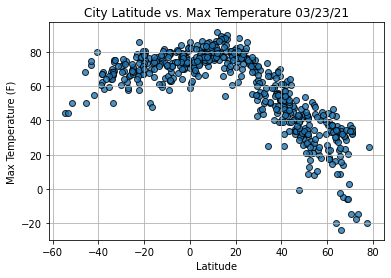

In [15]:
# import the time module
import time

# build the scatter plot for lat versus max temp
plt.scatter(lats,
           max_temps,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

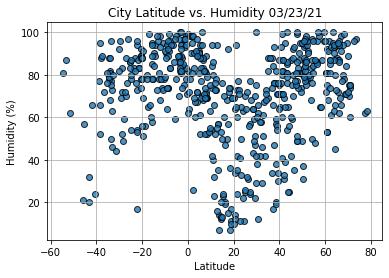

In [16]:
# build the scatter plot for lat versus max temp
plt.scatter(lats,
           humidity,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

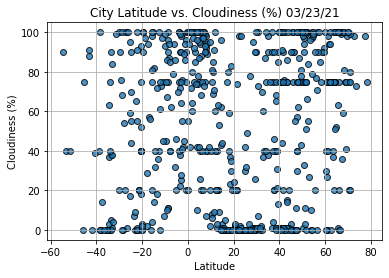

In [17]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")
plt.show()

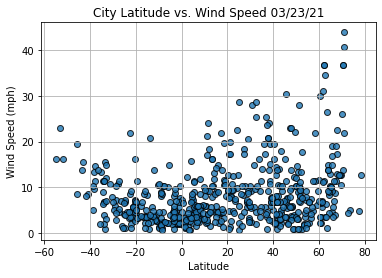

In [18]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig4.png")
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                     Djambala
Country                        CG
Date          2021-03-23 23:18:38
Lat                       -2.5447
Lng                       14.7533
Max Temp                    70.18
Humidity                       88
Cloudiness                     76
Wind Speed                   4.76
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
563     True
564     True
565    False
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Roald,NO,2021-03-23 23:18:35,62.5833,6.1333,46.40,61,75,34.52
2,Khaniotis,GR,2021-03-23 23:18:35,39.9991,23.5800,39.00,75,100,5.01
6,Butembo,CD,2021-03-23 23:18:36,0.1500,29.2833,58.82,82,55,3.11
10,Laguna,US,2021-03-23 23:18:37,38.4210,-121.4238,69.01,20,1,24.16
15,Mamallapuram,IN,2021-03-23 23:18:38,12.6264,80.1722,75.20,94,40,1.66


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

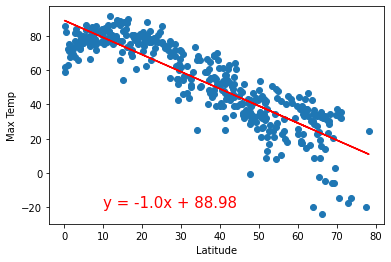

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

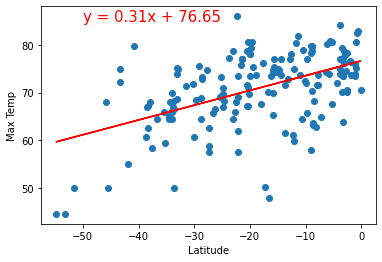

In [55]:
# linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemipsphere \
                      for Maximum Temperature', 'Max Temp',(-50,85))

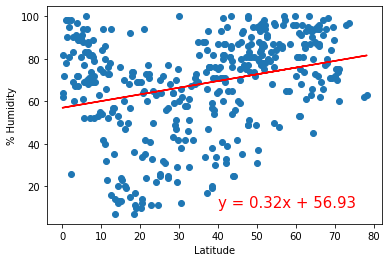

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

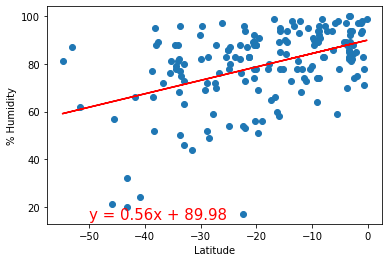

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

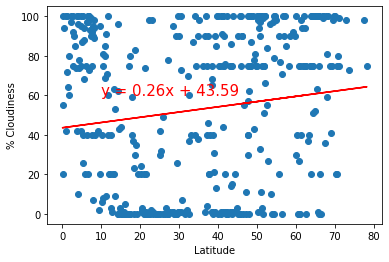

In [57]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere / for % Cloudiness', '% Cloudiness', (10,60))


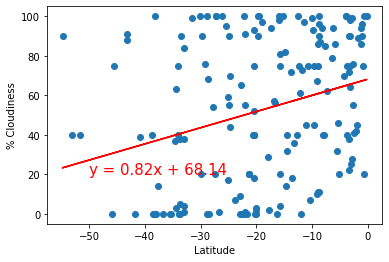

In [60]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness', (-50,20))


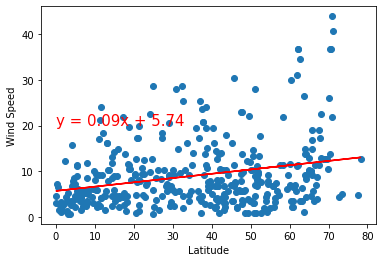

In [63]:
# plot linear regression for wind speed northern and southern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear regression on the Northern Hemisphere \ for wind speed', 'Wind Speed', (0,20))

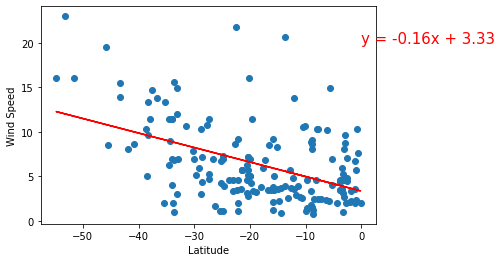

In [64]:
# plot linear regression for wind speed northern and southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear regression on the Southern Hemisphere \ for wind speed', 'Wind Speed', ())